# UCI Adult Data Set 

The dataset has details of 32561 people with the following 14 features:

[Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/adult)

![](adult.png)

In [14]:
%%time

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Wall time: 0 ns


In [15]:
%%time

data = pd.read_csv("adult1.csv")
data.head()

Wall time: 82.4 ms


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1.  Explore the data by completing the following tasks?
- How many men and women (sex feature) are represented in this dataset? 

- What is the average age (age feature) of women? 

- What is the percentage of German citizens (native-country feature)?

In [13]:
%%time

print(data['sex'].value_counts())
print(data.loc[data['sex'] == 'Female', 'age'].mean())
print(float((data['native-country'] == 'Germany').sum()) / data.shape[0])

Male      21790
Female    10771
Name: sex, dtype: int64
36.85823043357163
0.004207487485028101
Wall time: 15 ms


### 2. For people who recieve more than 50K per year (salary feature), what is the mean and standard deviation of their age?  Simiarly for people who receive less than 50K per year?

In [5]:
ages1 = data.loc[data['salary'] == '>50K', 'age']
ages2 = data.loc[data['salary'] == '<=50K', 'age']
print("The average age of people who earn more than 50k is: {0} +- {1} years, people who earn less than 50k - {2} +- {3} years.".format(
    round(ages1.mean()), round(ages1.std(), 1),
    round(ages2.mean()), round(ages2.std(), 1)))

The average age of people who earn more than 50k is: 44 +- 10.5 years, people who earn less than 50k - 37 +- 14.0 years.


### 3. Display the statistics of age for each gender of all the races (race feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [6]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

### 4. As computers understand only numbers, we will do some preprocessing tasks for encoding the categorical features.

- Encode Salary column such that wherever we have salary more than 50k that is '>50k' we encode it to 1 else 0. 
- One hot encode the categorical features.
- Split features and target variable into X and y respectively.

In [16]:
%%time

data['salary'] = data['salary'].apply(lambda x: 1 if x=='>50K' else 0)
X = pd.get_dummies(data.drop("salary",1))
y = data[["salary"]]

Wall time: 74.8 ms


### 5. Perform the following operation on dataset.
- Split the data X and y into X_train,X_test,y_train and y_test in the ratio 70:30
- Further split the training data into train and validation in 80:20 ratio
- Then apply the base Decision Tree Classifier model and calculate the accuracy on validation data as well as on test data.

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_val)
y_pred1 = clf.predict(X_test)
print("Accuracy Score on validation data: ", accuracy_score(y_val,y_pred))
print("Accuracy Score on test data: ", accuracy_score(y_test,y_pred1))

Accuracy Score on validation data:  0.8045624040359728
Accuracy Score on test data:  0.8135940219060293


In [ ]:
pip install xgboost

### 6. Perform ensembling using the models Decision Tree Classifier and Logistic Regression, using a VotingClassifier keeping the parameter voting as `soft` and the calculate the accuracy.

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score , roc_curve
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = DecisionTreeClassifier()
model2 = LogisticRegression()

model = VotingClassifier(estimators=[('dt', model1), ('lr', model2)], voting='soft')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy is ',model.score(X_test,y_test))

SyntaxError: invalid syntax (<unknown>, line 1)

## What is the Effect of adding more trees

- Train 3 different ensemble classifiers in the form of gradient boosted trees. Train models with 10, 50 and  100 trees.Use the n_estimators parameter in the boosted tree module.

- n-estimators:
    - The number of sequential trees to be modeled 
    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point.

- Let's get sarted with a model with n_estimators = 10 and max_depth=6:


```python
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6).fit(X_train, y_train)
```

### 7. Perform the following Boosting task on below two models.

- Train two models with 
```python
A) n_estimators = 50 & max_depth = 6
B) n_estimators =100 & max_depth= 6
```
- Calculate the accuracy on validation data and testing data.

**Things to ponder**

- Which model has the best accuracy on the validation data?
- Is it always true that the model with the most trees will perform best on validation data?

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6, random_state=0).fit(X_train1, y_train1)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=0).fit(X_train1, y_train1)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=0).fit(X_train1, y_train1)
print("Accuracy on validation data for model_10: ",model_10.score(X_val,y_val))
print("Accuracy on validation data for model_50: ",model_50.score(X_val,y_val))
print("Accuracy on validation data for model_100: ",model_100.score(X_val,y_val))

print("Accuracy on test data for model_10: ",model_10.score(X_test,y_test))
print("Accuracy on test data for model_50: ",model_50.score(X_test,y_test))
print("Accuracy on test data for model_100: ",model_100.score(X_test,y_test))

Accuracy on validation data for model_10:  0.8447027856986181
Accuracy on validation data for model_50:  0.8677341522263654
Accuracy on validation data for model_100:  0.8677341522263654
Accuracy on test data for model_10:  0.8542327771522162
Accuracy on test data for model_50:  0.8722489507626164
Accuracy on test data for model_100:  0.8742962432183438


### 8. Based on the best gradient boosting classifier you found in the previous task, plot a bar plot of the model's top 10 features with it's feature importance score

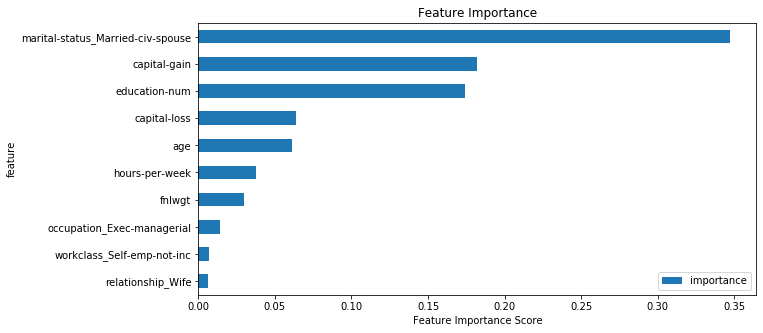

In [11]:
feat_imp = pd.DataFrame({'importance':model_100.feature_importances_})    
feat_imp['feature'] = X_train1.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:10]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importance", figsize=(10,5))
plt.xlabel('Feature Importance Score')
plt.show()

## 9. Plot the training and testing error vs. number of trees

- Steps to follow:

**Step 1: Calculate the classification error for model on the training data (train_data).**

**Step 2: Store the training errors into a list (called training_errors) that looks like this:**

```python 
[train_err_10, train_err_50, train_err_100]
```
**Step 3: Calculate the classification error of each model on the validation data (validation_data).**

**Step 4: Store the validation classification error into a list (called validation_errors) that looks like this:**

```python
[validation_err_10, validation_err_50,validation_err_100]
```
**Step 5: Calculate the classification error of each model on the test data (test_data).**

**Step 6: Store the testing classification error into a list (called testing_errors) that looks like this:**
```python
[testing_err_10, testing_err_50,testing_err_100]
```

**Things to ponder**

- Does the training error reduce as the number of trees increases?Is it always true that the validation error will reduce as the number of trees increases?

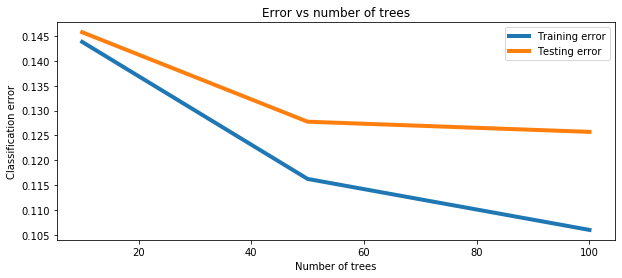

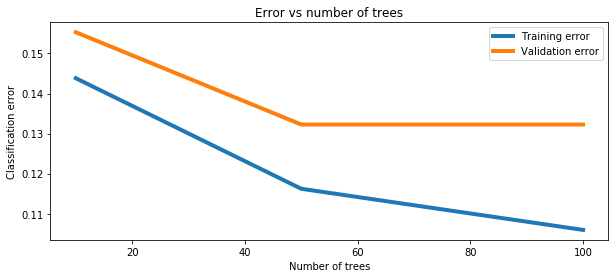

In [12]:
train_err_10 = 1-model_10.score(X_train,y_train)
train_err_50 = 1-model_50.score(X_train,y_train)
train_err_100 = 1-model_100.score(X_train,y_train)

training_errors = [train_err_10, train_err_50, train_err_100]

testing_err_10 = 1-model_10.score(X_test,y_test)
testing_err_50 = 1-model_50.score(X_test,y_test)
testing_err_100 = 1-model_100.score(X_test,y_test)

testing_errors = [testing_err_10, testing_err_50, testing_err_100]

validation_err_10 = 1-model_10.score(X_val,y_val)
validation_err_50 = 1-model_50.score(X_val,y_val)
validation_err_100 = 1-model_100.score(X_val,y_val)

validation_errors = [validation_err_10, validation_err_50, validation_err_100]


plt.figure(figsize=(10,4))
plt.plot([10, 50, 100], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100], testing_errors, linewidth=4.0, label='Testing error')
plt.title('Error vs number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Classification error')
plt.legend(["Training error","Testing error"])
plt.show()


plt.figure(figsize=(10,4))
plt.plot([10, 50, 100], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100], validation_errors, linewidth=4.0, label='Validation error')
plt.title('Error vs number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Classification error')
plt.legend(["Training error","Validation error"])
plt.show()